In [6]:
import polars as pl
import matplotlib.pyplot as plt
import scipy.integrate as spint
import numpy as np

In [22]:
def test(t, x):
    ydot = 5.0-3.0/2.0*x[0]**2

    xdot = np.hstack([ydot])
    return xdot


IC = np.array([10.])
tspan = np.linspace(1.0, 1.2, 1000)

results = spint.solve_ivp(
    fun = test,
    t_span=[1.0,1.2],
    y0=IC,
    t_eval=tspan,
    method='RK23'
)

results

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e+00  1.000e+00 ...  1.200e+00  1.200e+00]
        y: [[ 1.000e+01  9.971e+00 ...  2.921e+00  2.919e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 29
     njev: 0
      nlu: 0

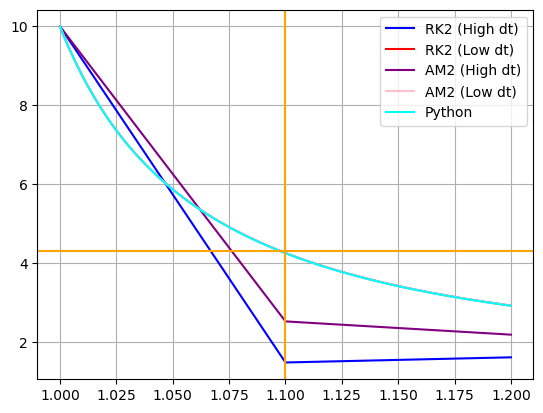

In [25]:
new_data = pl.read_csv('am2.csv')
low_dt = pl.read_csv('low_dt_am2.csv')
comp = pl.read_csv('am2_act.csv')
am2_low = pl.read_csv('am2_test.csv')

plt.plot(new_data['Time'], new_data['Y'], color='Blue', label='RK2 (High dt)')
plt.plot(low_dt['Time'], low_dt['Y'], color='Red', label='RK2 (Low dt)')
plt.plot(comp['Time'], comp['Y'], color='purple', label='AM2 (High dt)')
plt.plot(am2_low['Time'], am2_low['Y'], color='pink', label='AM2 (Low dt)')
plt.plot(results.t, results.y[0], color='Cyan', label='Python')

plt.axvline(x=1.1, color='orange')
plt.axhline(y=4.3, color='orange')

plt.grid()
plt.legend()

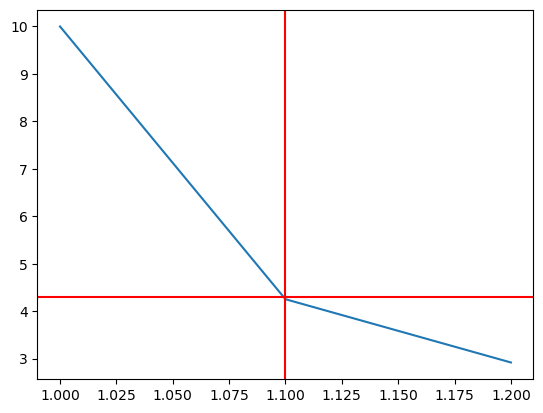

In [16]:
plt.plot(results.t, results.y[0])

plt.axvline(x=1.1, color='red')
plt.axhline(y=4.3, color='red')